In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-06_154014.txt' #QD_29

In [4]:
data = pd.read_csv(file_name, sep="\t")  # Read the file with tab as the delimiter

# Extract the columns
x = data["Time (ps)"] / 1000 # Time in ns
y = data["Counts per bin"]

In [40]:
def plot_lineal(x, y, fit_ini, width, height, font_size):

    plt.figure(figsize=(width, height))  # Define el tamaño de la figura
    plt.plot(x - min(x), y, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5, label='Data')
    plt.plot(x[fit_ini::] - min(x), y[fit_ini::], marker='o', color='red', markersize=1, linestyle='-', linewidth=1, label='Fitting points')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Histogram Plot (Linear Scale)')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin', fontsize=font_size)
    plt.grid(True)
    plt.legend(fontsize=font_size)
    
    plt.show()
    
def plot_logarithmic(x, y, fit_ini, width, height, font_size):
    
    plt.figure(figsize=(width, height))  # Define el tamaño de la figura
    plt.plot(x - min(x), y, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5, label='Data')
    plt.plot(x[fit_ini::] - min(x), y[fit_ini::], marker='o', color='red', markersize=1, linestyle='-', linewidth=1, label='Fitting')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Histogram Plot (Logarithmic Scale)')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin (log scale)', fontsize=font_size)
    plt.yscale('log')  # Set Y-axis to logarithmic scale
    plt.grid(True, which="both")  # Enable grid for both major and minor ticks
    plt.legend(fontsize=font_size)
    
    plt.show()


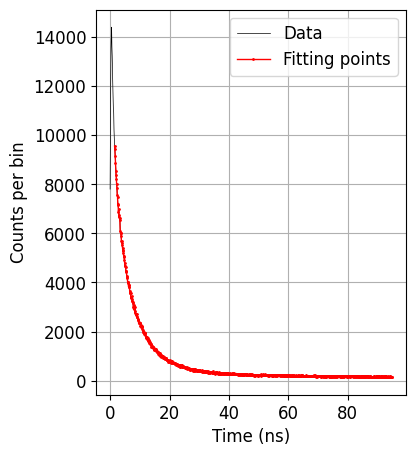

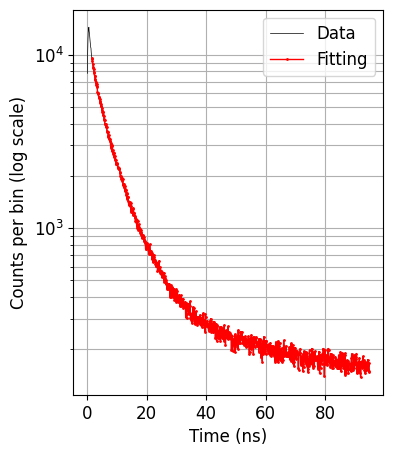

In [53]:
width = 4 
height = 5
font_size = 12

i_ini = 650 # Inital index of the plot
i_end = 1600 # Final index of the plot
fit_ini = 15 # Initial index for the fit

plot_lineal(x[i_ini:i_end], y[i_ini:i_end], fit_ini, width, height, font_size)
plot_logarithmic(x[i_ini:i_end], y[i_ini:i_end], fit_ini, width, height, font_size)

In [54]:
def exp_func(x, A, B, x_0, tau):
        return A + B * np.exp(-(x - x_0) / tau)

def fit_exponential(x, y):
    
    params, pcov = curve_fit(exp_func, x, y, p0=[np.min(y), np.max(y)-np.min(y), np.min(x), 4.0])
    return params, pcov

def plot_fit_lineal(x, y, fit_ini, params, width, height, font_size):
    
    x_fit = np.linspace(min(x[fit_ini::]), max(x[fit_ini::]), 1000)
    y_fit = exp_func(x_fit, *params)
    
    plt.figure(figsize=(width, height))
    plt.plot(x - min(x), y, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5, label='Data')
    plt.plot(x_fit - min(x), y_fit, marker='o', color='green', markersize=0, linestyle='-', linewidth=1, label='Fitted points')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Exponential Fit')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin', fontsize=font_size)
    plt.grid(True)
    plt.legend(fontsize=font_size)
    
    plt.show()
    
def plot_fit_logarithmic(x, y, fit_ini, params, width, height, font_size):
    
    x_fit = np.linspace(min(x[fit_ini::]), max(x[fit_ini::]), 1000)
    y_fit = exp_func(x_fit, *params)
    
    plt.figure(figsize=(width, height))
    plt.plot(x - min(x), y, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5, label='Data')
    plt.plot(x_fit - min(x), y_fit, marker='o', color='green', markersize=0, linestyle='-', linewidth=1, label='Fitted graph')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Exponential Fit')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin', fontsize=font_size)
    plt.yscale('log')  # Set Y-axis to logarithmic scale
    plt.grid(True)
    plt.legend(fontsize=font_size)
    
    plt.show()

A: 236.306 ± 4.102 counts
B: 22741.414 ± 12037275530.834 counts
t_0: 60.436 ± 3232441.776 ns
tau: 6.107 ± 0.030 ns


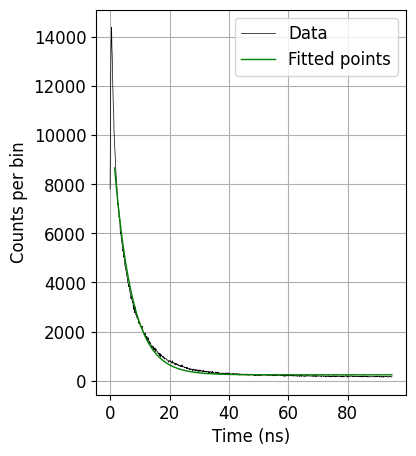

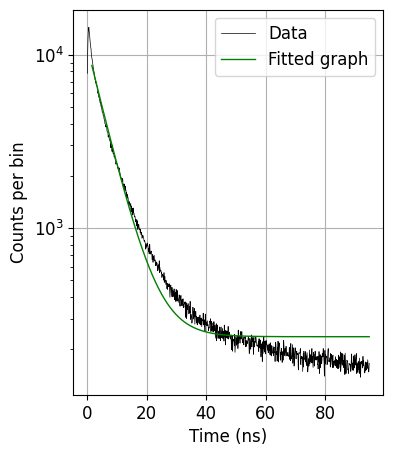

In [55]:
params, pcov = fit_exponential(x[(i_ini + fit_ini):i_end], y[(i_ini + fit_ini):i_end])

# Calculate the standard deviations of the parameters
perr = np.sqrt(np.diag(pcov))

print(f"A: {params[0]:.3f} ± {perr[0]:.3f} counts")
print(f"B: {params[1]:.3f} ± {perr[1]:.3f} counts")
print(f"t_0: {params[2]:.3f} ± {perr[2]:.3f} ns")
print(f"tau: {params[3]:.3f} ± {perr[3]:.3f} ns")

plot_fit_lineal(x[i_ini:i_end], y[i_ini:i_end], fit_ini, params, width, height, font_size)
plot_fit_logarithmic(x[i_ini:i_end], y[i_ini:i_end], fit_ini, params, width, height, font_size)